In [1]:
'''Импортируем необходимые для работы пакеты'''
from cProfile import label
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [2]:
# объявляем собственную функцию взятия гиперболического котангенса (нет в стандарте)
def coth(x):
    return np.cosh(x) / np.sinh(x)

In [3]:
c = 340 # скорость звука (м/c)
rho = 1.21 # плотность воздуха (кг/м^3)
Z0 = c * rho # волновое сопротивление воздуха

sigma = 50000 # сопротивление потоку
l = 0.0254 # толщина (видимо, толщина потока -- не ясно, в каких единицах; вероятно в м)
f = np.arange(100, 10000, 50) # диапазон частот, с которым мы собираемся работать

nf = len(f) # количество значений в диапазоне частот

In [4]:
'''Delany and Bazley (модель распространения акустических волн)'''

X = rho * f / sigma # безразмерная величина, характиризующая используемую модель (модель Delany and Bazley)
zc = rho * c * (1 + 0.0571 * np.power(X, -0.754) - 1j * 0.087 * np.power(X, -0.732)) # волновое сопротивление
k = (2 * pi / c) * f * (1 + 0.0978 * np.power(X, -0.700) - 1j * 0.189 * np.power(X, -0.595)) # комплексное волновое число

gamma = 1j * k # постоянная распространения
z = zc * coth(gamma * l) # поверхностное сопротивление

R = (z - Z0) / (z + Z0) # коэффициент отражения
anormal = 1 - np.power(abs(R), 2) # коэффициент поглащения

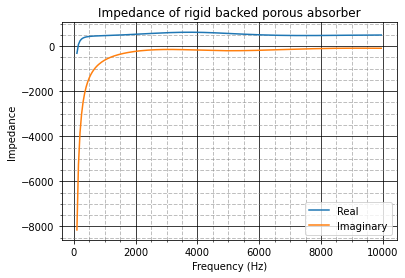

In [5]:
'''Строим графики'''

fig1, ax1 = plt.subplots()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Impedance')
plt.title("Impedance of rigid backed porous absorber")
ax1.plot(f, z.real, label='Real')
ax1.plot(f, z.imag, label='Imaginary')
ax1.legend()
'''чтобы включить сетку, раскоментируйте следующие 3 строчки'''
ax1.minorticks_on()
ax1.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax1.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)
plt.show()

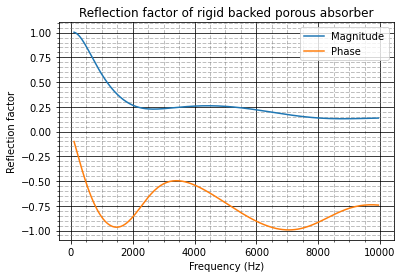

In [6]:
fig2, ax2 = plt.subplots()
plt.title("Reflection factor of rigid backed porous absorber")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Reflection factor')
ax2.plot(f, abs(R), label='Magnitude')
ax2.plot(f, np.arctan(R.imag / R.real), label='Phase')
ax2.legend()
'''чтобы включить сетку, раскоментируйте следующие 3 строчки'''
ax2.minorticks_on()
ax2.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax2.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)
plt.show()

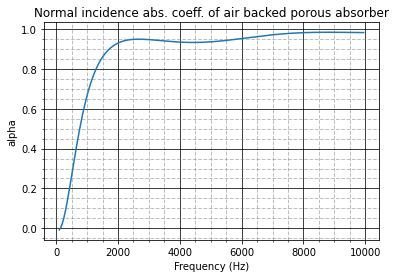

In [7]:
fig3, ax3 = plt.subplots()
plt.title("Normal incidence abs. coeff. of air backed porous absorber")
plt.xlabel('Frequency (Hz)')
plt.ylabel('alpha')
ax3.plot(f, anormal)
'''чтобы включить сетку, раскоментируйте следующие 3 строчки'''
ax3.minorticks_on()
ax3.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax3.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)
plt.show()